In [1]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import statsmodels.graphics.gofplots as sm
import math
import collections
from scipy.stats import chi2

In [2]:
# import dataset from nCoV2019-master/latest_data on April 13, 2020
# renamed latestdata.csv as covid_data_apr_13.csv
ds = pd.read_csv("covid_data_apr_13.csv")

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (1,2,9,10,12,13,14,15,16,17,18,19,21,22,23,24,25,26,27,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
def get_first_digit(x):
    while x >= 10:
        x /= 10
    return int(x)
def get_sec_digit(x):
    while x >= 100:
        x /= 10
    return int(x%10)
def get_first_two_digits(x):
    while x >= 100:
        x /= 10
    return int(x)

In [4]:
# chinese data
china = ds[ds.country.eq("China")]

# chinese city counts
china_city_counts = np.array(china['city'].value_counts())
china_city_greater10 = china_city_counts[china_city_counts >= 10]

# chinese province counts
china_prov_counts = np.array(china['province'].value_counts())
china_prov_greater10 = china_prov_counts[china_prov_counts >= 10]

In [5]:
# extracting first, second, and first two digits from chinese city counts
china_city_first = [get_first_digit(x) for x in china_city_counts]
china_city_second = [get_sec_digit(x) for x in china_city_greater10]
china_city_firsttwo = [get_first_two_digits(x) for x in china_city_greater10]

# extracting first, second, and first two digits from chinese province counts
china_prov_first = [get_first_digit(x) for x in china_prov_counts]
china_prov_second = [get_sec_digit(x) for x in china_prov_greater10]
china_prov_firsttwo = [get_first_two_digits(x) for x in china_prov_greater10]

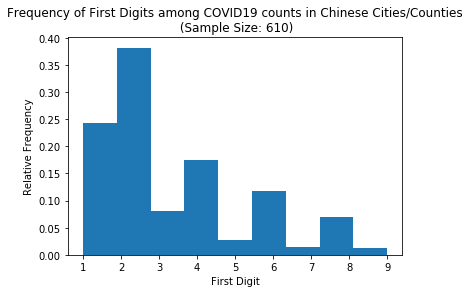

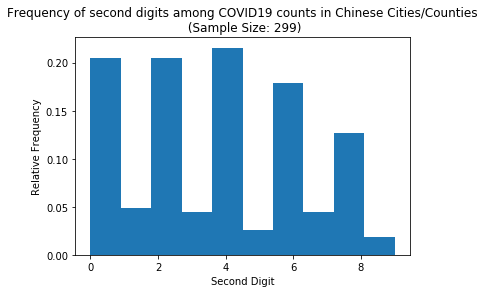

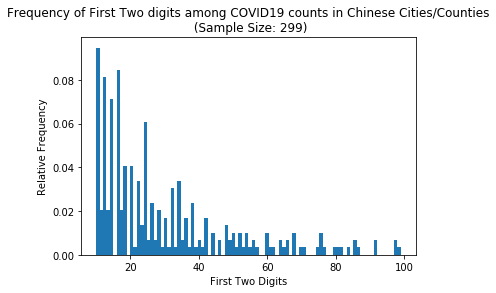

In [6]:
# chinese cities: histograms
# first digit
plt.hist(china_city_first, bins=9,density=True)
plt.title("Frequency of First Digits among COVID19 counts in Chinese Cities/Counties"+"\n (Sample Size: " 
          + str(len(china_city_first))+")")
plt.xlabel("First Digit")
plt.ylabel("Relative Frequency")
plt.show()

# second digit
plt.hist(china_city_second, bins=10,density=True)
plt.title("Frequency of second digits among COVID19 counts in Chinese Cities/Counties"+"\n (Sample Size: " 
          + str(len(china_city_second))+")")
plt.xlabel("Second Digit")
plt.ylabel("Relative Frequency")
plt.show()

# first two digits
plt.hist(china_city_firsttwo, bins=90,density=True)
plt.title("Frequency of First Two digits among COVID19 counts in Chinese Cities/Counties"+"\n (Sample Size: " 
          + str(len(china_city_firsttwo))+")")
plt.xlabel("First Two Digits")
plt.ylabel("Relative Frequency")
plt.show()

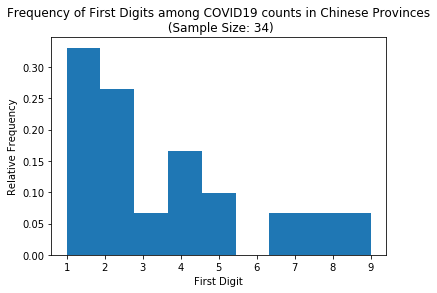

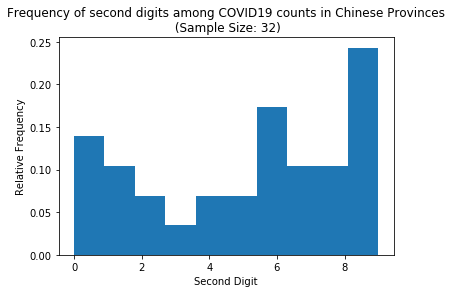

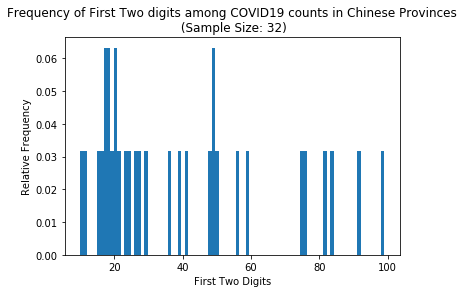

In [7]:
# chinese provinces: histograms

# first digit
plt.hist(china_prov_first, bins=9,density=True)
plt.title("Frequency of First Digits among COVID19 counts in Chinese Provinces"+"\n (Sample Size: " 
          + str(len(china_prov_first))+")")
plt.xlabel("First Digit")
plt.ylabel("Relative Frequency")
plt.show()

# second digit
plt.hist(china_prov_second, bins=10,density=True)
plt.title("Frequency of second digits among COVID19 counts in Chinese Provinces"+"\n (Sample Size: " 
          + str(len(china_prov_second))+")")
plt.xlabel("Second Digit")
plt.ylabel("Relative Frequency")
plt.show()

# first two digits
plt.hist(china_prov_firsttwo, bins=90,density=True)
plt.title("Frequency of First Two digits among COVID19 counts in Chinese Provinces"+"\n (Sample Size: " 
          + str(len(china_prov_firsttwo))+")")
plt.xlabel("First Two Digits")
plt.ylabel("Relative Frequency")
plt.show()

In [8]:
# us data
us = ds[ds.country.eq("United States")]

# us city counts
us_city_counts = np.array(us['city'].value_counts())
us_city_greater10 = us_city_counts[us_city_counts >= 10]

# us province counts
us_prov_counts = np.array(us['province'].value_counts())
us_prov_greater10 = us_prov_counts[us_prov_counts >= 10]

In [9]:
# extracting first, second, and first two digits from us city counts
us_city_first = [get_first_digit(x) for x in us_city_counts]
us_city_second = [get_sec_digit(x) for x in us_city_greater10]
us_city_firsttwo = [get_first_two_digits(x) for x in us_city_greater10]

# extracting first, second, and first two digits from us province counts
us_prov_first = [get_first_digit(x) for x in us_prov_counts]
us_prov_second = [get_sec_digit(x) for x in us_prov_greater10]
us_prov_firsttwo = [get_first_two_digits(x) for x in us_prov_greater10]

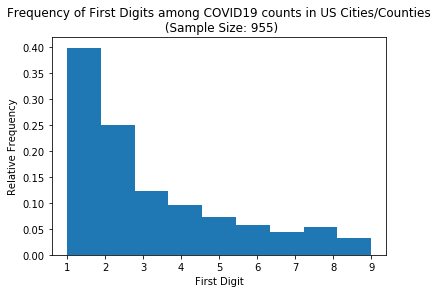

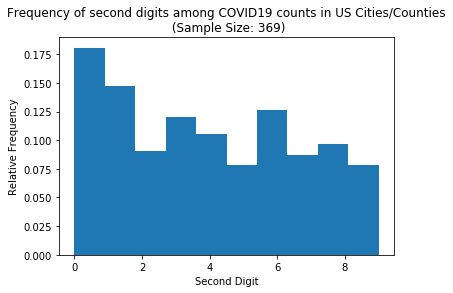

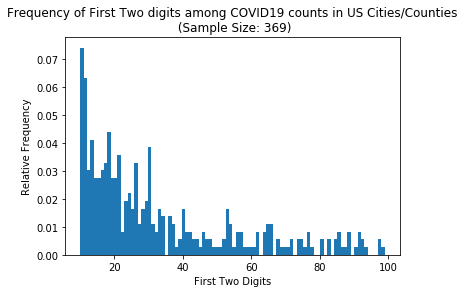

In [10]:
# us cities: histograms

# first digit
plt.hist(us_city_first, bins=9,density=True)
plt.title("Frequency of First Digits among COVID19 counts in US Cities/Counties"+"\n (Sample Size: " 
          + str(len(us_city_first))+")")
plt.xlabel("First Digit")
plt.ylabel("Relative Frequency")
plt.show()

# second digit
plt.hist(us_city_second, bins=10,density=True)
plt.title("Frequency of second digits among COVID19 counts in US Cities/Counties"+"\n (Sample Size: " 
          + str(len(us_city_second))+")")
plt.xlabel("Second Digit")
plt.ylabel("Relative Frequency")
plt.show()

# first two digits
plt.hist(us_city_firsttwo, bins=90,density=True)
plt.title("Frequency of First Two digits among COVID19 counts in US Cities/Counties"+"\n (Sample Size: " 
          + str(len(us_city_firsttwo))+")")
plt.xlabel("First Two Digits")
plt.ylabel("Relative Frequency")
plt.show()

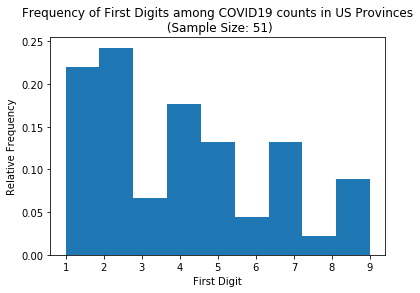

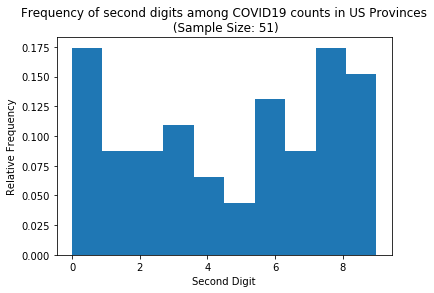

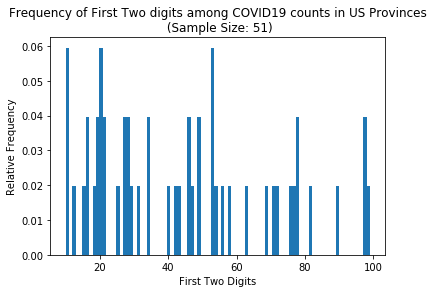

In [11]:
# us provinces: histograms

# first digit
plt.hist(us_prov_first, bins=9,density=True)
plt.title("Frequency of First Digits among COVID19 counts in US Provinces"+"\n (Sample Size: " 
          + str(len(us_prov_first))+")")
plt.xlabel("First Digit")
plt.ylabel("Relative Frequency")
plt.show()

# second digit
plt.hist(us_prov_second, bins=10,density=True)
plt.title("Frequency of second digits among COVID19 counts in US Provinces"+"\n (Sample Size: " 
          + str(len(us_prov_second))+")")
plt.xlabel("Second Digit")
plt.ylabel("Relative Frequency")
plt.show()

# first two digits
plt.hist(us_prov_firsttwo, bins=90,density=True)
plt.title("Frequency of First Two digits among COVID19 counts in US Provinces"+"\n (Sample Size: " 
          + str(len(us_prov_firsttwo))+")")
plt.xlabel("First Two Digits")
plt.ylabel("Relative Frequency")
plt.show()

In [12]:
# get frequencies for 1st digit and 1st 2 digits Benford's law distribution
def get_benford_pdf(lst):
    probs = []
    for d in lst:
        probs.append(math.log(1+1/d,10))
    return probs

# get frequencies for 2nd digit Benford's law distribution
def get_second_digit_benford_pdf(lst):
    probs = []
    for element in lst:
        d = element % 10
        sum_prob = 0
        
        # probability that d is the nth digit is
        # sum_{k = 10^{n-2}}^{10^{n-1} - 1} log_10(1 + 1/(10k + d))
        # (ex.) 0th digit dist is log(1 + 1/10) + ... + log (1 + 1/90)
        for k in range(1, 10):
            denom = 10*k + d
            sum_prob += math.log(1+1/denom, 10)
            
        probs.append(sum_prob)
    return probs
        

In [13]:
first_digits = np.arange(1,10)
first_dig_pdf = get_benford_pdf(first_digits)
first_dig_cdf = np.cumsum(first_dig_pdf)

second_digits = np.arange(10)
second_dig_pdf = get_second_digit_benford_pdf(second_digits)
second_dig_cdf = np.cumsum(second_dig_pdf)

first_two_digits = np.arange(10,100)
first_two_dig_pdf = get_benford_pdf(first_two_digits)
first_two_dig_cdf = np.cumsum(first_two_dig_pdf)

In [14]:
# TESTS
def sig_stat(statistic, critical_val):
    if statistic > critical_val:
        return("SIGNIFICANT")
    else:
        return("")

def chi_squared_test(degrees_freedom, empirical_count, expected_count):
    crit_val5 = chi2.ppf(0.95, degrees_freedom)
    crit_val1 = chi2.ppf(0.99, degrees_freedom)

    chi_square_stat = 0  # chi square test statistic
    for data, expected in zip(empirical_count, expected_count):
        chi_square = math.pow(data - expected, 2)
        chi_square_stat += chi_square / expected

    print("\nChi-squared Test Statistic = {:.3f}".format(chi_square_stat))
    print("Critical value at a P-value of 0.05 is {:.3f}. ".format(crit_val5) 
          + sig_stat(chi_square_stat, crit_val5))  
    print("Critical value at a P-value of 0.01 is {:.3f}. ".format(crit_val1) 
          + sig_stat(chi_square_stat, crit_val1))  
    
def ks_test(sample_size, ecdf, expected_cdf):
    ks_stat = np.max(np.abs(np.subtract(ecdf, expected_cdf)))
    ks_crit_val5 = 1.36/(sample_size**0.5)
    ks_crit_val1 = 1.63/(sample_size**0.5)
    print("\nKS Test Statistic = {:.3f}".format(ks_stat))
    print("Critical value at a P-value of 0.05 is {:.3f}. ".format(ks_crit_val5) + sig_stat(ks_stat, ks_crit_val5))  
    print("Critical value at a P-value of 0.01 is {:.3f}. ".format(ks_crit_val1) + sig_stat(ks_stat, ks_crit_val1))
    
    
def cvm_tests(sample_size, ecdf, cdf, epdf, pdf): 
    # cramer von mise statistics
    p = pdf + [pdf[0]]
    
    # weights
    t = []
    for i in range(len(pdf)):
        t.append((p[i]+p[i+1])/2)
        
    Z = np.subtract(ecdf, cdf)
    Z_bar = np.sum(np.multiply(Z,t))
    
    # W_d^2 = n \sum Z_i^2t_i
    cvm_vals = np.multiply(np.power(Z,2),t)
    cvm_stat = sample_size * np.sum(cvm_vals)
    print("\nCramer von Mises Statistic = {:.3f}".format(cvm_stat))
    print("Critical value at a P-value of 0.05 is 0.471. " + sig_stat(cvm_stat, 0.471))  
    print("Critical value at a P-value of 0.01 is 0.768. " + sig_stat(cvm_stat, 0.768))  
    
    # U_d^2 = n \sum (Z_i - Z_bar)^2 t_i
    watson_vals = np.multiply(np.power(np.subtract(Z,Z_bar),2),t)
    watson_stat = sample_size * np.sum(watson_vals)
    print("\nWatson Statistic = {:.3f}".format(watson_stat))
    print("Critical value at a P-value of 0.05 is 0.205. " + sig_stat(watson_stat, 0.205))
    print("Critical value at a P-value of 0.01 is 0.304. " + sig_stat(watson_stat, 0.304))
    
    # A_d^2 = n \sum Z_i^2 t_i/(T_i(1-T_i))
    ad_vals = np.divide(np.multiply(np.power(Z,2),t),np.multiply(pdf,np.subtract(1, pdf)))
    ad_stat = sample_size * np.sum(ad_vals)
    print("\nAnderson-Darling Statistic = {:.3f}".format(ad_stat))
    print("Critical value at a P-value of 0.05 is 2.304. " + sig_stat(ad_stat, 2.304))
    print("Critical value at a P-value of 0.01 is 3.688. " + sig_stat(ad_stat, 3.688))
    
def stat_tests(data, start_digit, end_digit, exp_pdf):
    # law type = 0 if single digit BL, 1 if two digits BL
    test = ""
    
    number_digits = end_digit - start_digit + 1
    if number_digits == 9:
        test = "First"
    elif number_digits == 10:
        test = "Second"
    elif number_digits == 90:
        test = "First Two"
    
    digits = np.arange(start_digit, end_digit + 1)
    # get pdf and cdf of data
    data.sort()
    counter = collections.Counter(data)
    sample_size = len(data) 

    # tallying frequency of (first/second/first two) digits in data
    data_count = np.zeros(len(exp_pdf))
    for i in counter:
        data_count[i-start_digit] = counter[i]
        
    data_pdf = np.divide(data_count, sample_size)
    data_cdf = np.cumsum(data_pdf)
    exp_cdf = np.cumsum(exp_pdf)
    exp_count = [round(p * sample_size) for p in exp_pdf]
    
    
    # plot data with expected distribution
    plt.plot(digits,exp_pdf,marker=".")
    plt.bar(digits,data_pdf,color='0.75')
    plt.xlabel("Digit")
    plt.ylabel("Relative Frequency")
    plt.title("Empirical Distribution of " + test + " digits \nOverlayed with Benford's Law Distribution")
    plt.show()

    # degrees of freedom: end_digit - start_digit + 1 - 1 (k categories -> chi_{k-1}^2)
    chi_squared_test(number_digits - 1, data_count, exp_count)
    
    ks_test(sample_size, data_cdf, exp_cdf)
    
#     # kuiper test
#     Dplus = np.max(np.subtract(exp_cdf, data_cdf))
#     Dminus = np.max(np.subtract(data_cdf, exp_cdf))
#     k_stat = Dplus + Dminus
#     print("Kuiper Test Statistic = {:.3f}".format(k_stat))
#     print("Critical value at a P-value of 0.05 is 1.321") 
    
    cvm_tests(sample_size, data_cdf, exp_cdf, data_pdf, exp_pdf)





# def stat_tests(data,law_type,exp_pdf):
#     # law type = 0 if single digit BL, 1 if two digits BL
    
#     digits = np.arange(10**law_type,10**law_type + len(exp_pdf))
#     # get pdf and cdf of data
#     data.sort()
#     counter = collections.Counter(data)
#     sample_size = len(data) 
    
#     # tallying frequency of (first/first two) digits in data
#     data_count = np.zeros(len(exp_pdf))
#     for i in counter:
#         data_count[i-10**law_type] = counter[i]
        
#     data_pdf = np.divide(data_count, sample_size)
#     data_cdf = np.cumsum(data_pdf)
#     exp_cdf = np.cumsum(exp_pdf)
#     exp_count = [round(p * sample_size) for p in exp_pdf]
    
#     # plot data with expected distribution
#     plt.plot(digits,exp_pdf,marker=".")
#     plt.bar(digits,data_pdf,color='0.75')
#     plt.xlabel("Digit")
#     plt.ylabel("Relative Frequency")
#     plt.title("Empirical Distribution overlayed with Benford's Law Distribution")
#     plt.show()

#     chi_squared_test(8, data_count, exp_count)
    
#     ks_test(sample_size, data_cdf, exp_cdf)
    
# #     # kuiper test
# #     Dplus = np.max(np.subtract(exp_cdf, data_cdf))
# #     Dminus = np.max(np.subtract(data_cdf, exp_cdf))
# #     k_stat = Dplus + Dminus
# #     print("Kuiper Test Statistic = {:.3f}".format(k_stat))
# #     print("Critical value at a P-value of 0.05 is 1.321") 
    
#     cvm_tests(sample_size, data_cdf, exp_cdf, data_pdf, exp_pdf)
    
    
# #     return [chi_square_stat,ks_stat,k_stat,cvm_stat,watson_stat,ad_stat]

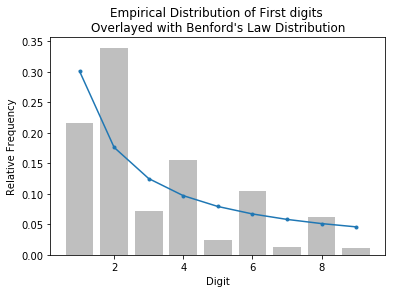


Chi-squared Test Statistic = 217.343
Critical value at a P-value of 0.05 is 15.507. SIGNIFICANT
Critical value at a P-value of 0.01 is 20.090. SIGNIFICANT

KS Test Statistic = 0.085
Critical value at a P-value of 0.05 is 0.055. SIGNIFICANT
Critical value at a P-value of 0.01 is 0.066. SIGNIFICANT

Cramer von Mises Statistic = 2.309
Critical value at a P-value of 0.05 is 0.471. SIGNIFICANT
Critical value at a P-value of 0.01 is 0.768. SIGNIFICANT

Watson Statistic = 2.231
Critical value at a P-value of 0.05 is 0.205. SIGNIFICANT
Critical value at a P-value of 0.01 is 0.304. SIGNIFICANT

Anderson-Darling Statistic = 18.090
Critical value at a P-value of 0.05 is 2.304. SIGNIFICANT
Critical value at a P-value of 0.01 is 3.688. SIGNIFICANT


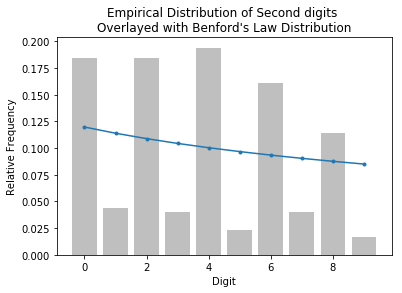


Chi-squared Test Statistic = 133.214
Critical value at a P-value of 0.05 is 16.919. SIGNIFICANT
Critical value at a P-value of 0.01 is 21.666. SIGNIFICANT

KS Test Statistic = 0.098
Critical value at a P-value of 0.05 is 0.079. SIGNIFICANT
Critical value at a P-value of 0.01 is 0.094. SIGNIFICANT

Cramer von Mises Statistic = 1.003
Critical value at a P-value of 0.05 is 0.471. SIGNIFICANT
Critical value at a P-value of 0.01 is 0.768. SIGNIFICANT

Watson Statistic = 0.401
Critical value at a P-value of 0.05 is 0.205. SIGNIFICANT
Critical value at a P-value of 0.01 is 0.304. SIGNIFICANT

Anderson-Darling Statistic = 11.169
Critical value at a P-value of 0.05 is 2.304. SIGNIFICANT
Critical value at a P-value of 0.01 is 3.688. SIGNIFICANT


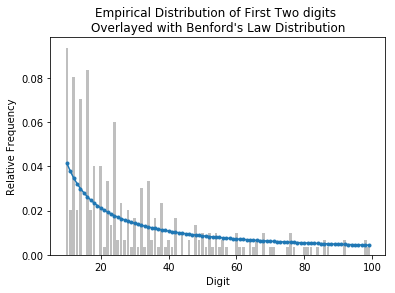


Chi-squared Test Statistic = 257.879
Critical value at a P-value of 0.05 is 112.022. SIGNIFICANT
Critical value at a P-value of 0.01 is 122.942. SIGNIFICANT

KS Test Statistic = 0.185
Critical value at a P-value of 0.05 is 0.079. SIGNIFICANT
Critical value at a P-value of 0.01 is 0.094. SIGNIFICANT

Cramer von Mises Statistic = 4.699
Critical value at a P-value of 0.05 is 0.471. SIGNIFICANT
Critical value at a P-value of 0.01 is 0.768. SIGNIFICANT

Watson Statistic = 0.811
Critical value at a P-value of 0.05 is 0.205. SIGNIFICANT
Critical value at a P-value of 0.01 is 0.304. SIGNIFICANT

Anderson-Darling Statistic = 379.203
Critical value at a P-value of 0.05 is 2.304. SIGNIFICANT
Critical value at a P-value of 0.01 is 3.688. SIGNIFICANT


In [15]:
# evaluating benford's law for chinese cities (first/second/first two digits)
stat_tests(china_city_first, 1, 9, first_dig_pdf)
stat_tests(china_city_second, 0, 9, second_dig_pdf)
stat_tests(china_city_firsttwo, 10, 99, first_two_dig_pdf)

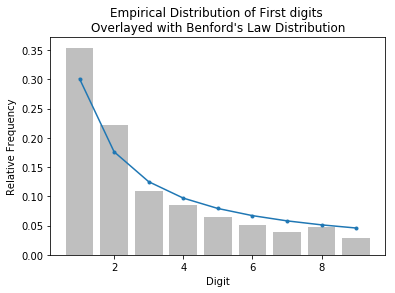


Chi-squared Test Statistic = 42.640
Critical value at a P-value of 0.05 is 15.507. SIGNIFICANT
Critical value at a P-value of 0.01 is 20.090. SIGNIFICANT

KS Test Statistic = 0.099
Critical value at a P-value of 0.05 is 0.044. SIGNIFICANT
Critical value at a P-value of 0.01 is 0.053. SIGNIFICANT

Cramer von Mises Statistic = 3.536
Critical value at a P-value of 0.05 is 0.471. SIGNIFICANT
Critical value at a P-value of 0.01 is 0.768. SIGNIFICANT

Watson Statistic = 1.013
Critical value at a P-value of 0.05 is 0.205. SIGNIFICANT
Critical value at a P-value of 0.01 is 0.304. SIGNIFICANT

Anderson-Darling Statistic = 29.342
Critical value at a P-value of 0.05 is 2.304. SIGNIFICANT
Critical value at a P-value of 0.01 is 3.688. SIGNIFICANT


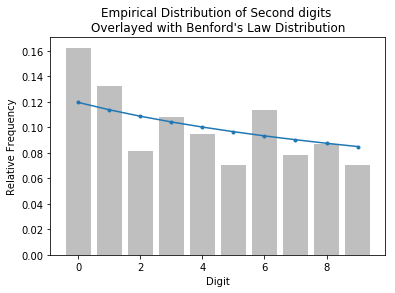


Chi-squared Test Statistic = 15.650
Critical value at a P-value of 0.05 is 16.919. 
Critical value at a P-value of 0.01 is 21.666. 

KS Test Statistic = 0.062
Critical value at a P-value of 0.05 is 0.071. 
Critical value at a P-value of 0.01 is 0.085. 

Cramer von Mises Statistic = 0.419
Critical value at a P-value of 0.05 is 0.471. 
Critical value at a P-value of 0.01 is 0.768. 

Watson Statistic = 0.120
Critical value at a P-value of 0.05 is 0.205. 
Critical value at a P-value of 0.01 is 0.304. 

Anderson-Darling Statistic = 4.310
Critical value at a P-value of 0.05 is 2.304. SIGNIFICANT
Critical value at a P-value of 0.01 is 3.688. SIGNIFICANT


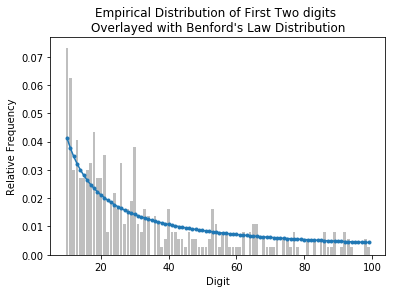


Chi-squared Test Statistic = 120.267
Critical value at a P-value of 0.05 is 112.022. SIGNIFICANT
Critical value at a P-value of 0.01 is 122.942. 

KS Test Statistic = 0.145
Critical value at a P-value of 0.05 is 0.071. SIGNIFICANT
Critical value at a P-value of 0.01 is 0.085. SIGNIFICANT

Cramer von Mises Statistic = 2.711
Critical value at a P-value of 0.05 is 0.471. SIGNIFICANT
Critical value at a P-value of 0.01 is 0.768. SIGNIFICANT

Watson Statistic = 0.537
Critical value at a P-value of 0.05 is 0.205. SIGNIFICANT
Critical value at a P-value of 0.01 is 0.304. SIGNIFICANT

Anderson-Darling Statistic = 211.820
Critical value at a P-value of 0.05 is 2.304. SIGNIFICANT
Critical value at a P-value of 0.01 is 3.688. SIGNIFICANT


In [16]:
# evaluating benford's law for us cities (first/second/first two digits)
stat_tests(us_city_first, 1, 9, first_dig_pdf)
stat_tests(us_city_second, 0, 9, second_dig_pdf)
stat_tests(us_city_firsttwo, 10, 99, first_two_dig_pdf)